# Case Study - Retain Customers

About Dataset

Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets] Content

Each row represents a customer, each column contains customer's attributes described on the column Metadata.

The data set includes information about:
 * Customers who left within the last month - the column is called Churn
 * Services that each customer has signed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
 * Customer account information - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
 * Demographic info about customers - gender, age range, and if they have partners and dependents

In [1]:
# Import related libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read csv file(dataset) using pandas
customer=pd.read_csv(r"E:\Function UP\Python\Projects\case study - Retain customers\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
#The head() method returns a specified number of rows, string from the top.
customer.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


# Exploring Dataset

In [5]:
## Customers who left within the last month - the column is called Churn.
## Services that each customer has signed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support,
#  and streaming TV and movies.
## Customer account information - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
## Demographic info about customers - gender, age range, and if they have partners and dependents

In [6]:
#prints information about the DataFrame
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#The describe() method returns description/ descriptive statistics of the numerical data in the DataFrame.
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# returns description  of the string / object data in the DataFrame.
customer.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [9]:
#list the variables or columns in data frame
customer.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [10]:
#find the transpose of the data frame
customer.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [11]:
#Return DataFrame with duplicate rows removed.
customer.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
#find null values or datapoints in data frame
customer.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
#returns the number of unique values for each column.
customer.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [14]:
#identify unique values in each columns and list it out

print('gender :- ', customer['gender'].unique())
print('SeniorCitizen-',customer['SeniorCitizen'].unique())
print('Partner-',customer['Partner'].unique())
print('Dependents-',customer['Dependents'].unique())
print('tenure-',customer['tenure'].unique())
print('MultipleLines-',customer['MultipleLines'].unique())
print('InternetService-',customer['InternetService'].unique())
print('OnlineSecurity-',customer['OnlineSecurity'].unique())
print('OnlineBackup-',customer['OnlineBackup'].unique())
print('DeviceProtection-',customer['DeviceProtection'].unique())
print('TechSupport-',customer['TechSupport'].unique())
print('StreamingTV-',customer['StreamingTV'].unique())
print('StreamingMovies-',customer['StreamingMovies'].unique())
print('Contract-',customer['Contract'].unique())
print('PaperlessBilling-',customer['PaperlessBilling'].unique())
print('PaymentMethod-',customer['PaymentMethod'].unique())
print('MonthlyCharges-',customer['MonthlyCharges'].unique())
print('TotalCharges-',customer['TotalCharges'].unique())
print('Churn-',customer['Churn'].unique())

gender :-  ['Female' 'Male']
SeniorCitizen- [0 1]
Partner- ['Yes' 'No']
Dependents- ['No' 'Yes']
tenure- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
MultipleLines- ['No phone service' 'No' 'Yes']
InternetService- ['DSL' 'Fiber optic' 'No']
OnlineSecurity- ['No' 'Yes' 'No internet service']
OnlineBackup- ['Yes' 'No' 'No internet service']
DeviceProtection- ['No' 'Yes' 'No internet service']
TechSupport- ['No' 'Yes' 'No internet service']
StreamingTV- ['No' 'Yes' 'No internet service']
StreamingMovies- ['No' 'Yes' 'No internet service']
Contract- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling- ['Yes' 'No']
PaymentMethod- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges- [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges- ['29.85' '1889.5' '

In [15]:
# I created a new column 'age' by using these three 'SeniorCitizen','Partner','Dependents' for better insight and analysis
# 1st creat a function and then creat a new column 'age'

In [16]:
#creat a function for age
def choose(customer):
    list_age = []
    for j,k,l in zip(customer['SeniorCitizen'],customer['Partner'],customer['Dependents']):
        if j == 1:
            list_age.append('SeniorCitizen(60-70)')
        elif k == 'Yes' and l == 'No':
            list_age.append('Adult(21-30)')
        elif k == 'Yes' and l == 'Yes':
            list_age.append('Mid-age(31-59)')
        else:
            list_age.append('Young(18-20)')
    return list_age

In [17]:
age=choose(customer)
print(age)

['Adult(21-30)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Adult(21-30)', 'Young(18-20)', 'Mid-age(31-59)', 'Young(18-20)', 'Adult(21-30)', 'Young(18-20)', 'Young(18-20)', 'Mid-age(31-59)', 'Young(18-20)', 'Young(18-20)', 'Mid-age(31-59)', 'Young(18-20)', 'SeniorCitizen(60-70)', 'Adult(21-30)', 'Young(18-20)', 'Adult(21-30)', 'Mid-age(31-59)', 'Young(18-20)', 'Mid-age(31-59)', 'Mid-age(31-59)', 'Adult(21-30)', 'Young(18-20)', 'SeniorCitizen(60-70)', 'SeniorCitizen(60-70)', 'Mid-age(31-59)', 'Young(18-20)', 'SeniorCitizen(60-70)', 'Mid-age(31-59)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Mid-age(31-59)', 'Mid-age(31-59)', 'Mid-age(31-59)', 'Young(18-20)', 'Adult(21-30)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Mid-age(31-59)', 'SeniorCitizen(60-70)', 'Young(18-20)', 'SeniorCitizen(60-70)', 'SeniorCitizen(60-70)', 'SeniorCitizen(60-70)', 'SeniorCitizen(60-70)', 'Mid-ag

In [18]:
#creat a new column 'age' and check if the variable contain null values
customer['Age'] = age
customer['Age'].isnull().sum()

0

In [19]:
#find the transpose of the data frame to check whether new changes got reflected in the data set
customer.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# Questions and its solutions

QUESTIONS

1. How many customers are present in the dataset?
2. What is the distribution of gender among the customers?
3. How does age vary among the customers?
4. What are the different locations from which customers belong?
5. How long have customers been using the service on average?
6. What is the distribution of subscription types?
7. What is the average monthly charge incurred by customers?
8. What is the range of total charges accumulated by customers?
9. How many customers have churned?
10. What is the churn rate in the dataset?
11. How does churn vary across different genders?
12. Are there any differences in churn based on the customer's age?
13. Are customers from specific locations more likely to churn?
14. Does the subscription type influence customer churn?
15. Is there any correlation between monthly charges and total charges?

SOLUTIONS

1.How many customers are present in the dataset?

In [20]:

print(f'Number of customers present in the dataset is', customer['customerID'].count())


Number of customers present in the dataset is 7043


2. What is the distribution of gender among the customers?

In [21]:
customer['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Text(0, 0.5, 'Count')

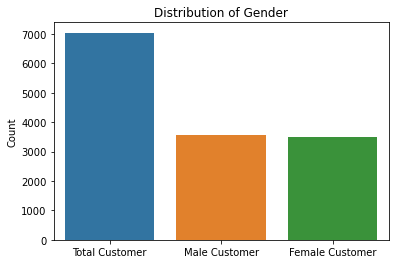

In [22]:
# check the distribution of gender among customer

total_customer = customer['gender'].count()
male_customer = customer['gender'].value_counts()['Male']
female_customer = customer['gender'].value_counts()['Female']

sns.barplot(data=customer,x=['Total Customer', 'Male Customer', 'Female Customer'], y=[total_customer,male_customer,female_customer])
plt.title('Distribution of Gender')
plt.ylabel('Count')
#plt.xlabel('Gender')

3.How does age vary among the customers?

In [23]:
age_group = customer['Age'].value_counts().reset_index()
age_group.columns = ['Age','Count']
age_group

,Age,Count
0,Young(18-20),3072
1,Mid-age(31-59),1666
2,Adult(21-30),1163
3,SeniorCitizen(60-70),1142


<AxesSubplot:xlabel='Age', ylabel='Count'>

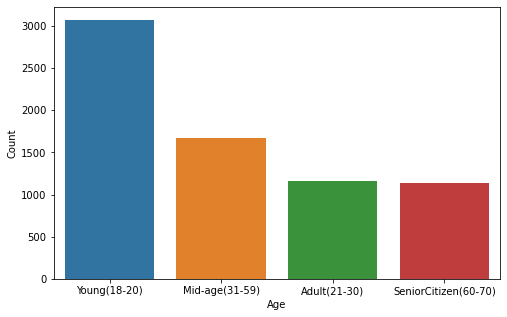

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data=customer,x=age_group['Age'],y=age_group['Count'])

Among the age group Young(18 - 20), Mid-age(31 - 59), Adult(21 - 30), SeniorCitizen(60 - 70) we can say that Young and
Middle aged customer are more in numbers that other aged group.

4. What are the different locations from which customers belong?

In [25]:
# There are no demographic column present in the given dataset on which we find out the location of the customers. 
# so I assume that all customers are come from same location.Therefore I creat a location column with considering same values.

customer['Location'] = 'Area-1'
customer.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [26]:
customer.groupby('Location')['Age'].value_counts().unstack()

Age,Adult(21-30),Mid-age(31-59),SeniorCitizen(60-70),Young(18-20)
Location,,,,
Area-1,1163,1666,1142,3072


In [27]:
customer.groupby('Location')['gender'].value_counts().unstack()

gender,Female,Male
Location,,
Area-1,3488,3555


Since there are same location called Area -1 as per my assumption ,but there are verious age group and both genderwise customer are present

5. How long have customers been using the service on average?


In [28]:
#Finding Average service tenure for total customers
total_customer_service_tenure = round(customer['tenure'].mean(),2)
print('Average Time for which Customers use the various services is', total_customer_service_tenure, 'Months')

Average Time for which Customers use the various services is 32.37 Months


In [29]:
#Finding Average service tenure on 'PhoneService' for customers
average_phoneservice=customer.groupby('PhoneService')['tenure'].mean().round(2)['Yes']
print('Average Time for which Customers use the PhoneService is ', average_phoneservice, 'months')

Average Time for which Customers use the PhoneService is  32.44 months


In [30]:
#Finding Average service tenure on 'MultipleLines' for customers
average_MultipleLines = customer.groupby('MultipleLines')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the MultipleLines service is {average_MultipleLines} Months')

Average Time for which Customers use the MultipleLines service is 41.91 Months


In [31]:
#Finding Average service tenure on 'InternetService' for customers
print(customer.groupby('InternetService')['tenure'].mean().round(2))

#since we have two InternetService ie DSL AND Fiber Opitcs so we need to find average service tenure for both individually 
avg_InternetService_DSL = customer.groupby('InternetService')['tenure'].mean().round(2)['DSL']
avg_InternetService_Fiber_optic = customer.groupby('InternetService')['tenure'].mean().round(2)['Fiber optic']
print(f'Average Time for which Customers use the InternetService(DSL) service is {avg_InternetService_DSL} Months')
print(f'Average Time for which Customers use the InternetService(Fiber optic) service is {avg_InternetService_Fiber_optic} Months')

InternetService
DSL            32.82
Fiber optic    32.92
No             30.55
Name: tenure, dtype: float64
Average Time for which Customers use the InternetService(DSL) service is 32.82 Months
Average Time for which Customers use the InternetService(Fiber optic) service is 32.92 Months


In [32]:
#Finding Average service tenure on 'OnlineSecurity' for customers
avg_OnlineSecurity = customer.groupby('OnlineSecurity')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the OnlineSecurity service is {avg_OnlineSecurity} Months')

Average Time for which Customers use the OnlineSecurity service is 45.05 Months


In [33]:
#Finding Average service tenure on 'OnlineBackup' for customers
avg_OnlineBackup = customer.groupby('OnlineBackup')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the OnlineBackup service is {avg_OnlineBackup} Months')

Average Time for which Customers use the OnlineBackup service is 44.57 Months


In [34]:
#Finding Average service tenure on 'DeviceProtection' for customers
avg_DeviceProtection = customer.groupby('DeviceProtection')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the DeviceProtection service is {avg_DeviceProtection} Months')

Average Time for which Customers use the DeviceProtection service is 44.6 Months


In [35]:
#Finding Average service tenure on 'TechSupport' for customers
avg_TechSupport = customer.groupby('TechSupport')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the TechSupport service is {avg_TechSupport} Months')

Average Time for which Customers use the TechSupport service is 44.82 Months


In [36]:
#Finding Average service tenure on 'StreamingTV' for customers
avg_StreamingTV = customer.groupby('StreamingTV')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the StreamingTV service is {avg_StreamingTV} Months')

Average Time for which Customers use the StreamingTV service is 41.07 Months


In [37]:
#Finding Average service tenure on 'StreamingMovies' for customers
avg_StreamingMovies = customer.groupby('StreamingMovies')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the StreamingMovies service is {avg_StreamingMovies} Months')

Average Time for which Customers use the StreamingMovies service is 41.2 Months


6. What is the distribution of subscription types?

In [38]:
subscription_type=customer['Contract'].value_counts().reset_index()
subscription_type

,index,Contract
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


<AxesSubplot:xlabel='index', ylabel='Contract'>

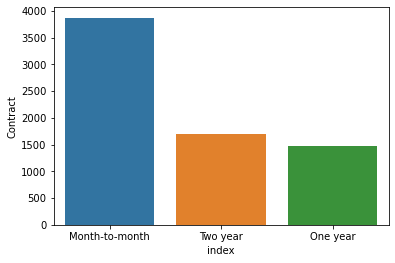

In [39]:
sns.barplot(x=subscription_type['index'],y=subscription_type['Contract'])

Here Month-to-Month subscription type is highest among Two year and One year

7. What is the average monthly charge incurred by customers?

In [48]:
round(customer['MonthlyCharges'].mean(),2)
print('Average Time for which Customers use the StreamingMovies service is :', round(customer['MonthlyCharges'].mean(),2))

Average Time for which Customers use the StreamingMovies service is : 64.76


8. What is the range of total charges accumulated by customers?

In [63]:
# TotalCharges is of type object , first convert it to numeric befor finding the range
customer['TotalCharges'] = pd.to_numeric(customer['TotalCharges'],errors = 'coerce')

print(f"The range of total charges accumulated by customers is from {customer['TotalCharges'].min()} to {customer['TotalCharges'].max()}")


The range of total charges accumulated by customers is from 18.8 to 8684.8


9. How many customers have churned?

In [64]:
print(customer['Churn'].value_counts()['Yes'], 'customers have churned')

1869 customers have churned


10. What is the churn rate in the dataset?

In [68]:
churn_rate = round((customer['Churn'].value_counts()['Yes']/customer['Churn'].count())*100,2)
print('The Chuen rate in the dataset is: ',churn_rate)

The Chuen rate in the dataset is:  26.54


11. How does churn vary across different genders?

In [72]:
print(customer.groupby('gender')['Churn'].value_counts().unstack())

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


In [85]:
#Lets find out among churned customers how many are male and female
churn = customer[customer['Churn']=='Yes']
churn_gender=churn.groupby('gender')['Churn'].size().reset_index()
churn_gender.rename(columns={'Churn': 'No_of_cust_churn'},inplace=True)
churn_gender['Churn_rate'] = np.round((churn_gender['No_of_cust_churn']*100)/len(customer['Churn']),2).astype(str)+'%'
churn_gender

,gender,No_of_cust_churn,Churn_rate
0,Female,939,13.33%
1,Male,930,13.2%


From above observation we can say that Churn_rate are close to similar for both gender

12. Are there any differences in churn based on the customer's age?


In [92]:
customer.groupby('Age')['Churn'].value_counts().unstack()

Churn,No,Yes
Age,,
Adult(21-30),921,242
Mid-age(31-59),1437,229
SeniorCitizen(60-70),666,476
Young(18-20),2150,922


So we can see that there are differences in churn based on the customer's age. Here number of churnd(922) is more in Young age group(18-20) customer as compare to othe age group customer and less in Mid-age(31-59) among others

13.  Are customers from specific locations more likely to churn?

In [93]:
customer.groupby('Location')['Churn'].value_counts().unstack()

Churn,No,Yes
Location,,
Area-1,5174,1869


14. Does the subscription type influence customer churn?

In [94]:
customer.groupby('Contract')['Churn'].value_counts().unstack()

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [96]:
churn = customer[customer['Churn']=='Yes']
pd.crosstab(churn.gender,churn.Contract,margins=True)

Contract,Month-to-month,One year,Two year,All
gender,,,,
Female,842,75,22,939
Male,813,91,26,930
All,1655,166,48,1869


Yes, as observed from both the table above we can say that subscription type influences the customer churn.

Customers with Month-to-month subscription plan are more likely to churn, as compared to customers with other type of subscription plan.

15. Is there any correlation between monthly charges and total charges?

In [98]:
correlation=customer.corr()
correlation

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


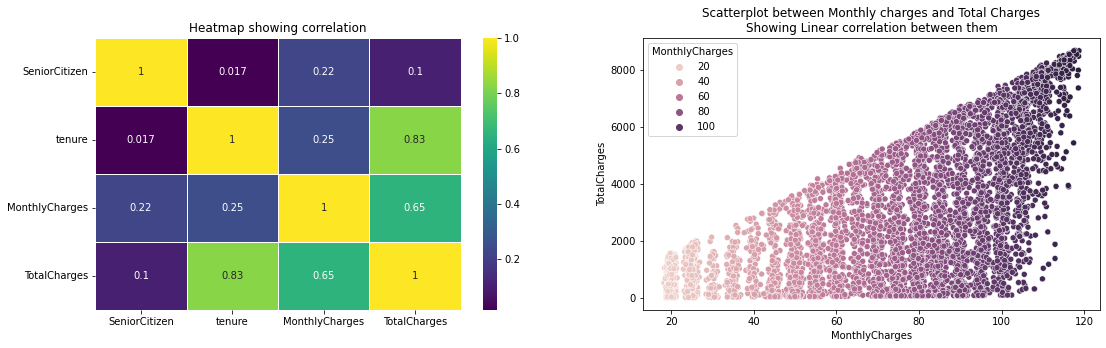

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))

sns.heatmap(correlation, cmap='viridis',ax=ax[0] ,annot=True,linewidth=0.5)
ax[0].set_title('Heatmap showing correlation')

sns.scatterplot(data=customer,x='MonthlyCharges',y='TotalCharges' , ax=ax[1] , hue='MonthlyCharges')
ax[1].set_title('Scatterplot between Monthly charges and Total Charges\nShowing Linear correlation between them')
plt.show()

So Yes, there exist a correlation between monthly charges and total charges

1. Correlation Type -> Linear.

2. Directionality -> Positive.

3. Correleation coefficient -> 0.65

4. Strength of Correlation -> Strong

In [101]:
Correlation = round(customer['MonthlyCharges'].corr(customer['TotalCharges']),3)
print("Correlation between monthly and total charges is:", Correlation)

Correlation between monthly and total charges is: 0.651
